# MNIST classification
### Example adopted from Chapter 3 of _the fundamentals of Machine Learning and Deep Learning in Python using Scikit-Learn, Keras and TensorFlow 2_ [Text (early release)](https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf) [GitHub](https://github.com/ageron/handson-ml2)

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MNIST-classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

MNIST is a dataset of 70,000 small images of digits handwritten digits. Each image has 28×28 pixels, thus totol of 784 features. Each feature is a grey level value from 0 - 255

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)  # load dataset from https://openml.org/ 
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

Convert the char type into int

In [4]:
y = y.astype(np.uint8)

The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classifier
Implement a _5 detector_
Prepare a data set for binary classification: 5 or not 5

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Use Stochastic Gradient Descent 

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #center the distribution around zero (mean), with a standard deviation of 1.
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3, random_state=42)

Fit the model with original unscaled samples

In [9]:
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_test_pred = sgd_clf.predict(X_test)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_pred)))

Accuracy score:  0.9492
Precision score:  0.6618887015177066
Recall score:  0.8800448430493274


Fit the model with scaled data

In [11]:
sgd_clf.fit(X_train_std, y_train_5) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Evaluate the model performance. 

In [12]:
y_test_pred = sgd_clf.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_pred)))

Accuracy score:  0.972
Precision score:  0.8796526054590571
Recall score:  0.7948430493273543


## Plot Precision Recall Curve

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance. 

In [13]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train_std, y_train_5, cv=3,
                             method="decision_function")

In [14]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

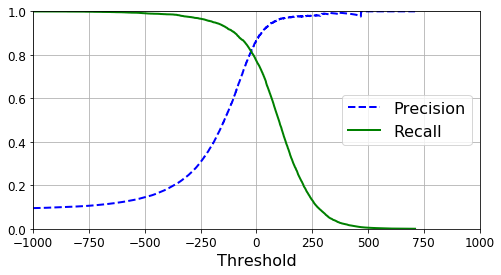

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-1000, 1000, 0, 1])               # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

## Logistic Regression Model

### Exercise 1: Use the Scikit-learn logistic regression model to build a five-detector. Print out the accuracy, precision and recall scores as in the previous example. 

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #center the distribution around zero (mean), with a standard deviation of 1.
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)

Fit the model with original unscaled samples

Fit the model with scaled data

In [29]:
lr.fit(X_train_std, y_train_5) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the model performance. 

In [30]:
y_test_pred = lr.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_pred)))

Accuracy score:  0.9771
Precision score:  0.9018181818181819
Recall score:  0.8340807174887892


## Stochastic gradient descent implementation for Logistic Regression

### Exercise 2: Use a STOCHASTIC logistic regression model from Scikit-learn to build a five-detector. Print out the accuracy, precision and recall scores as in the previous example. 

Hint: See Textbook Page 81

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd_clf = SGDClassifier(loss="log",tol=1e-3, random_state=42)

sgd_clf.fit(X_train_std, y_train_5) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Evaluate the model performance. 

In [33]:
y_test_pred = sgd_clf.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test_5, y_test_pred)))
print("Precision score: ", (precision_score(y_test_5, y_test_pred)))
print("Recall score: ", (recall_score(y_test_5, y_test_pred)))

Accuracy score:  0.9724
Precision score:  0.8802469135802469
Recall score:  0.7993273542600897
